# Keras Examples
Linear  Regression
Train  a one layer neural network for linear regression

In [1]:
'''
Linear Regression
'''
# Import the necessry libraries 

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [2]:
# Simulate some data as input dataset

def SimulData():
        # Simulate some data for training 
        x_train = np.arange(0,10, 0.25 )
        x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
        y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

        x_test = np.arange(0,10, 0.5 )
        x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
        y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size)

        return (x_train,y_train) , (x_test, y_test)
    
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData();

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

40 train samples
20 test samples


In [3]:
# Defining the model 

# Define that it is a FF model
model = Sequential()   

# add a dense layer of weights
model.add(Dense(1, activation='linear', input_shape=(1,)))


# print the model 
model.summary()

# Define the optimizer
s1 = SGD(lr=0.01)

# Set up the model algorithm, loss, optimizer 
model.compile(loss='mse',
              optimizer=s1,
              metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
4/4 [==============================] - 0s 24ms/step - loss: 5.6295 - mse: 5.6295 - val_loss: 0.2227 - val_mse: 0.2227
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2994 - mse: 0.2994 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3013 - mse: 0.3013 - val_loss: 0.2170 - val_mse: 0.2170
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2924 - mse: 0.2924 - val_loss: 0.2056 - val_mse: 0.2056
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2859 - mse: 0.2859 - val_loss: 0.2004 - val_mse: 0.2004
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2861 - mse: 0.2861 - val_loss: 0.1954 - val_mse: 0.1954
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3022 - mse: 0.3022 - val_loss: 0.1982 - val_mse: 0.1982
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2737 - mse: 0.2737 - val_loss: 

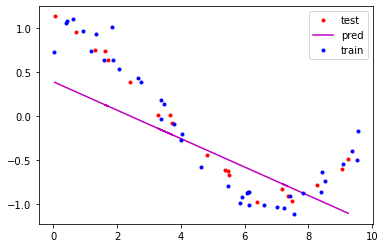

In [4]:
# Train the model
batch_size = 10
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# perform prediction using the test data
y_pred = model.predict(x_test);

# Find the loss
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

# Plot the results
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(x_test,y_pred,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

plt.legend()
plt.show()


In [ ]:
'''
TODO - 1. Add one more layer of 50 hidden neurons 
          and compare the differences in the output
       2. Compare the effect of L1 and L2 regularization 
          on the neural network in part 1
       3. Understand the effect of dropout on the 
          neural network defined in part 1
''' 

<h2 style="color:black;">1st Ans</h2>

In [5]:
def Model(x_train, y_train,x_test, y_test, batch_size, epochs, r):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(1,)))
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss='mse', optimizer=SGD(lr = r))
    
    history = model.fit(x_train, y_train, batch_size, epochs)
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    print("Test loss: ", model.evaluate(x_test, y_test))
    
    # Plot the results
    tst = plt.plot(x_test,y_test,'r.',label='test');
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');

    plt.legend()
    plt.show()

    
    return y_pred

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3585
Epoch 4/150
4/4 [==============================] - 0s 919us/step - loss: 0.3577
Epoch 5/150
4/4 [==============================] - 0s 808us/step - loss: 0.3421
Epoch 6/150
4/4 [==============================] - 0s 769us/step - loss: 0.3570
Epoch 7/150
4/4 [===========================

4/4 [==============================] - 0s 516us/step - loss: 0.1698
Epoch 95/150
4/4 [==============================] - 0s 499us/step - loss: 0.1693
Epoch 96/150
4/4 [==============================] - 0s 532us/step - loss: 0.1496
Epoch 97/150
4/4 [==============================] - 0s 540us/step - loss: 0.1577
Epoch 98/150
4/4 [==============================] - 0s 539us/step - loss: 0.1637
Epoch 99/150
4/4 [==============================] - 0s 531us/step - loss: 0.1535
Epoch 100/150
4/4 [==============================] - 0s 539us/step - loss: 0.1483
Epoch 101/150
4/4 [==============================] - 0s 694us/step - loss: 0.1598
Epoch 102/150
4/4 [==============================] - 0s 590us/step - loss: 0.1469
Epoch 103/150
4/4 [==============================] - 0s 545us/step - loss: 0.1584
Epoch 104/150
4/4 [==============================] - 0s 539us/step - loss: 0.1582
Epoch 105/150
4/4 [==============================] - 0s 530us/step - loss: 0.1411
Epoch 106/150
4/4 [================

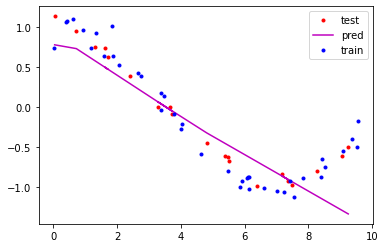

In [6]:
y_pred_1 = Model(x_train, y_train, x_test, y_test, 10, 150, 0.01)  # loss has decreased from 0.15 to 0.087

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 1.5687
Epoch 2/150
4/4 [==============================] - 0s 798us/step - loss: 0.3751
Epoch 3/150
4/4 [==============================] - 0s 729us/step - loss: 0.3987
Epoch 4/150
4/4 [==============================] - 0s 613us/step - loss: 0.3179
Epoch 5/150
4/4 [==============================] - 0s 692us/step - loss: 0.5132
Epoch 6/150
4/4 [==============================] - 0s 595us/step - loss: 0.3173
Epoch 7/150
4/4 [=======================

4/4 [==============================] - 0s 530us/step - loss: 0.1887
Epoch 95/150
4/4 [==============================] - 0s 607us/step - loss: 0.1679
Epoch 96/150
4/4 [==============================] - 0s 751us/step - loss: 0.1635
Epoch 97/150
4/4 [==============================] - 0s 746us/step - loss: 0.1747
Epoch 98/150
4/4 [==============================] - 0s 594us/step - loss: 0.1923
Epoch 99/150
4/4 [==============================] - 0s 657us/step - loss: 0.1679
Epoch 100/150
4/4 [==============================] - 0s 510us/step - loss: 0.1619
Epoch 101/150
4/4 [==============================] - 0s 600us/step - loss: 0.2496
Epoch 102/150
4/4 [==============================] - 0s 687us/step - loss: 0.1621
Epoch 103/150
4/4 [==============================] - 0s 555us/step - loss: 0.1674
Epoch 104/150
4/4 [==============================] - 0s 519us/step - loss: 0.1695
Epoch 105/150
4/4 [==============================] - 0s 568us/step - loss: 0.1734
Epoch 106/150
4/4 [================

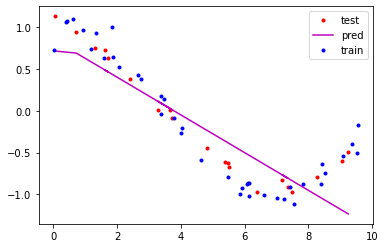

In [7]:
y_pred_2 = Model(x_train, y_train, x_test, y_test, 10, 150, 0.015) # loss approx same compare to y_pred_1

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 975us/step - loss: 1.7443
Epoch 2/150
4/4 [==============================] - 0s 519us/step - loss: 0.3327
Epoch 3/150
4/4 [==============================] - 0s 551us/step - loss: 0.3282
Epoch 4/150
4/4 [==============================] - 0s 531us/step - loss: 0.3256
Epoch 5/150
4/4 [==============================] - 0s 524us/step - loss: 0.3152
Epoch 6/150
4/4 [==============================] - 0s 513us/step - loss: 0.3312
Epoch 7/150
4/4 [=====================

4/4 [==============================] - 0s 718us/step - loss: 0.1799
Epoch 95/150
4/4 [==============================] - 0s 553us/step - loss: 0.1844
Epoch 96/150
4/4 [==============================] - 0s 621us/step - loss: 0.1713
Epoch 97/150
4/4 [==============================] - 0s 657us/step - loss: 0.1982
Epoch 98/150
4/4 [==============================] - 0s 524us/step - loss: 0.1677
Epoch 99/150
4/4 [==============================] - 0s 539us/step - loss: 0.1797
Epoch 100/150
4/4 [==============================] - 0s 798us/step - loss: 0.1832
Epoch 101/150
4/4 [==============================] - 0s 804us/step - loss: 0.1677
Epoch 102/150
4/4 [==============================] - 0s 631us/step - loss: 0.1655
Epoch 103/150
4/4 [==============================] - 0s 577us/step - loss: 0.1800
Epoch 104/150
4/4 [==============================] - 0s 531us/step - loss: 0.1717
Epoch 105/150
4/4 [==============================] - 0s 611us/step - loss: 0.1790
Epoch 106/150
4/4 [================

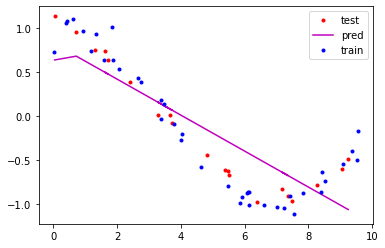

In [9]:
y_pred_3 = Model(x_train, y_train, x_test, y_test, 10, 150, 0.005) #loss has increased compare to y_pred_1

<h2 style="color:black;">2nd Ans</h2>

In [10]:
from keras import regularizers

def Model_Reg(x_train, y_train,x_test, y_test, batch_size, epochs, r, l):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(1,), kernel_regularizer=regularizers.l1(l), 
                    activity_regularizer=regularizers.l2(l)))
    
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss='mse', optimizer=SGD(lr = r))
    
    history = model.fit(x_train, y_train, batch_size, epochs)
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    print("Test loss: ", model.evaluate(x_test, y_test))
    
    # Plot the results
    tst = plt.plot(x_test,y_test,'r.',label='test');
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');

    plt.legend()
    plt.show()

    
    return y_pred

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 785us/step - loss: 0.9526
Epoch 2/150
4/4 [==============================] - 0s 587us/step - loss: 0.7016
Epoch 3/150
4/4 [==============================] - 0s 681us/step - loss: 0.6788
Epoch 4/150
4/4 [==============================] - 0s 616us/step - loss: 0.6564
Epoch 5/150
4/4 [==============================] - 0s 580us/step - loss: 0.6104
Epoch 6/150
4/4 [==============================] - 0s 565us/step - loss: 0.5875
Epoch 7/150
4/4 [=====================

4/4 [==============================] - 0s 740us/step - loss: 0.2129
Epoch 95/150
4/4 [==============================] - 0s 646us/step - loss: 0.1915
Epoch 96/150
4/4 [==============================] - 0s 543us/step - loss: 0.2016
Epoch 97/150
4/4 [==============================] - 0s 525us/step - loss: 0.1919
Epoch 98/150
4/4 [==============================] - 0s 520us/step - loss: 0.1916
Epoch 99/150
4/4 [==============================] - 0s 513us/step - loss: 0.2002
Epoch 100/150
4/4 [==============================] - 0s 508us/step - loss: 0.2012
Epoch 101/150
4/4 [==============================] - 0s 508us/step - loss: 0.1899
Epoch 102/150
4/4 [==============================] - 0s 513us/step - loss: 0.1934
Epoch 103/150
4/4 [==============================] - 0s 640us/step - loss: 0.1909
Epoch 104/150
4/4 [==============================] - 0s 633us/step - loss: 0.2028
Epoch 105/150
4/4 [==============================] - 0s 539us/step - loss: 0.2245
Epoch 106/150
4/4 [================

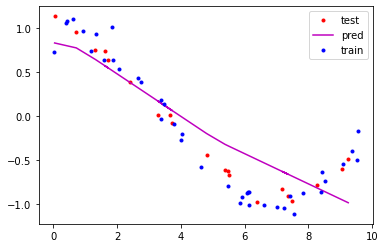

In [11]:
y_pred_r = Model_Reg(x_train, y_train,x_test, y_test, 10, 150, 0.01, 0.01)

# 0.01 regularize value is default value and we can choose between 0 to 0.1 on log scale

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 1ms/step - loss: 2.0954
Epoch 2/150
4/4 [==============================] - 0s 649us/step - loss: 0.4257
Epoch 3/150
4/4 [==============================] - 0s 574us/step - loss: 0.3860
Epoch 4/150
4/4 [==============================] - 0s 631us/step - loss: 0.4141
Epoch 5/150
4/4 [==============================] - 0s 625us/step - loss: 0.3624
Epoch 6/150
4/4 [==============================] - 0s 551us/step - loss: 0.3503
Epoch 7/150
4/4 [=======================

4/4 [==============================] - 0s 516us/step - loss: 0.2100
Epoch 95/150
4/4 [==============================] - 0s 616us/step - loss: 0.2474
Epoch 96/150
4/4 [==============================] - 0s 634us/step - loss: 0.2150
Epoch 97/150
4/4 [==============================] - 0s 720us/step - loss: 0.1834
Epoch 98/150
4/4 [==============================] - 0s 578us/step - loss: 0.1805
Epoch 99/150
4/4 [==============================] - 0s 596us/step - loss: 0.2059
Epoch 100/150
4/4 [==============================] - 0s 757us/step - loss: 0.1840
Epoch 101/150
4/4 [==============================] - 0s 619us/step - loss: 0.1991
Epoch 102/150
4/4 [==============================] - 0s 549us/step - loss: 0.1983
Epoch 103/150
4/4 [==============================] - 0s 690us/step - loss: 0.1808
Epoch 104/150
4/4 [==============================] - 0s 598us/step - loss: 0.2116
Epoch 105/150
4/4 [==============================] - 0s 599us/step - loss: 0.1834
Epoch 106/150
4/4 [================

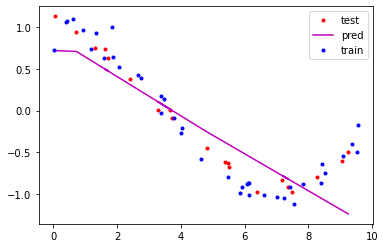

In [12]:
y_pred_r1 = Model_Reg(x_train, y_train,x_test, y_test, 10, 150, 0.01, 0.001)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8734
Epoch 2/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 3/150
4/4 [==============================] - 0s 969us/step - loss: 0.3642
Epoch 4/150
4/4 [==============================] - 0s 735us/step - loss: 0.3843
Epoch 5/150
4/4 [==============================] - 0s 707us/step - loss: 0.3277
Epoch 6/150
4/4 [==============================] - 0s 614us/step - loss: 0.3237
Epoch 7/150
4/4 [=========================

4/4 [==============================] - 0s 602us/step - loss: 0.2109
Epoch 95/150
4/4 [==============================] - 0s 580us/step - loss: 0.1709
Epoch 96/150
4/4 [==============================] - 0s 622us/step - loss: 0.1940
Epoch 97/150
4/4 [==============================] - 0s 715us/step - loss: 0.1763
Epoch 98/150
4/4 [==============================] - 0s 616us/step - loss: 0.1605
Epoch 99/150
4/4 [==============================] - 0s 593us/step - loss: 0.2035
Epoch 100/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1734
Epoch 101/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 102/150
4/4 [==============================] - 0s 913us/step - loss: 0.2590
Epoch 103/150
4/4 [==============================] - 0s 618us/step - loss: 0.2063
Epoch 104/150
4/4 [==============================] - 0s 722us/step - loss: 0.1862
Epoch 105/150
4/4 [==============================] - 0s 733us/step - loss: 0.1656
Epoch 106/150
4/4 [====================

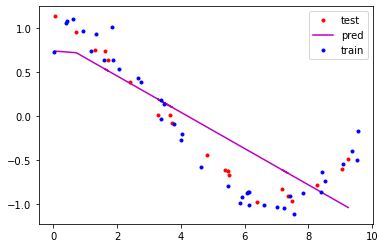

In [13]:
y_pred_r2 = Model_Reg(x_train, y_train,x_test, y_test, 10, 150, 0.01, 0.0001)

<h2 style="color:black;">3rd Ans</h2>

In [14]:
def Model_drop(x_train, y_train,x_test, y_test, batch_size, epochs, r, p):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(1,)))
    model.add(Dropout(p))
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss='mse', optimizer=SGD(lr = r))
    
    history = model.fit(x_train, y_train, batch_size, epochs)
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    print("Test loss: ", model.evaluate(x_test, y_test))
    
    # Plot the results
    tst = plt.plot(x_test,y_test,'r.',label='test');
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');

    plt.legend()
    plt.show()

    
    return y_pred

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                100       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 758us/step - loss: 0.7538
Epoch 2/150
4/4 [==============================] - 0s 539us/step - loss: 0.8448
Epoch 3/150
4/4 [==============================] - 0s 525us/step - loss: 0.7172
Epoch 4/150
4/4 [==============================] - 0s 530us/step - loss: 0.6177
Epoch 5/150
4/4 [==============================] - 0s 566us/step -

4/4 [==============================] - 0s 616us/step - loss: 0.2306
Epoch 94/150
4/4 [==============================] - 0s 547us/step - loss: 0.1559
Epoch 95/150
4/4 [==============================] - 0s 611us/step - loss: 0.1483
Epoch 96/150
4/4 [==============================] - 0s 561us/step - loss: 0.2164
Epoch 97/150
4/4 [==============================] - 0s 545us/step - loss: 0.2362
Epoch 98/150
4/4 [==============================] - 0s 663us/step - loss: 0.2325
Epoch 99/150
4/4 [==============================] - 0s 550us/step - loss: 0.1645
Epoch 100/150
4/4 [==============================] - 0s 620us/step - loss: 0.2078
Epoch 101/150
4/4 [==============================] - 0s 672us/step - loss: 0.1832
Epoch 102/150
4/4 [==============================] - 0s 682us/step - loss: 0.1769
Epoch 103/150
4/4 [==============================] - 0s 524us/step - loss: 0.2240
Epoch 104/150
4/4 [==============================] - 0s 516us/step - loss: 0.2170
Epoch 105/150
4/4 [=================

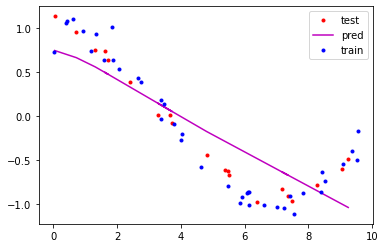

In [16]:
y_pred_drop = Model_drop(x_train, y_train, x_test, y_test, 10, 150, 0.01, 0.25)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 1ms/step - loss: 2.8395
Epoch 2/150
4/4 [==============================] - 0s 793us/step - loss: 0.4006
Epoch 3/150
4/4 [==============================] - 0s 683us/step - loss: 0.4502
Epoch 4/150
4/4 [==============================] - 0s 769us/step - loss: 0.4283
Epoch 5/150
4/4 [==============================] - 0s 661us/step - l

4/4 [==============================] - 0s 990us/step - loss: 0.1747
Epoch 94/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1935
Epoch 95/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1347
Epoch 96/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1776
Epoch 97/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1893
Epoch 98/150
4/4 [==============================] - 0s 785us/step - loss: 0.1827
Epoch 99/150
4/4 [==============================] - 0s 814us/step - loss: 0.1748
Epoch 100/150
4/4 [==============================] - 0s 771us/step - loss: 0.1605
Epoch 101/150
4/4 [==============================] - 0s 643us/step - loss: 0.1581
Epoch 102/150
4/4 [==============================] - 0s 588us/step - loss: 0.1602
Epoch 103/150
4/4 [==============================] - 0s 517us/step - loss: 0.1812
Epoch 104/150
4/4 [==============================] - 0s 506us/step - loss: 0.1502
Epoch 105/150
4/4 [=========================

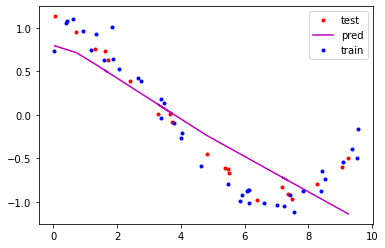

In [17]:
y_pred_drop1 = Model_drop(x_train, y_train, x_test, y_test, 10, 150, 0.01, 0.1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 838us/step - loss: 0.5091
Epoch 2/150
4/4 [==============================] - 0s 522us/step - loss: 0.5102
Epoch 3/150
4/4 [==============================] - 0s 585us/step - loss: 0.3499
Epoch 4/150
4/4 [==============================] - 0s 710us/step - loss: 0.5137
Epoch 5/150
4/4 [==============================] - 0s 772us/step 

4/4 [==============================] - 0s 583us/step - loss: 0.2115
Epoch 94/150
4/4 [==============================] - 0s 630us/step - loss: 0.1644
Epoch 95/150
4/4 [==============================] - 0s 580us/step - loss: 0.1910
Epoch 96/150
4/4 [==============================] - 0s 529us/step - loss: 0.1958
Epoch 97/150
4/4 [==============================] - 0s 521us/step - loss: 0.1819
Epoch 98/150
4/4 [==============================] - 0s 548us/step - loss: 0.1821
Epoch 99/150
4/4 [==============================] - 0s 595us/step - loss: 0.2139
Epoch 100/150
4/4 [==============================] - 0s 560us/step - loss: 0.1701
Epoch 101/150
4/4 [==============================] - 0s 515us/step - loss: 0.2287
Epoch 102/150
4/4 [==============================] - 0s 529us/step - loss: 0.1807
Epoch 103/150
4/4 [==============================] - 0s 505us/step - loss: 0.1535
Epoch 104/150
4/4 [==============================] - 0s 481us/step - loss: 0.1388
Epoch 105/150
4/4 [=================

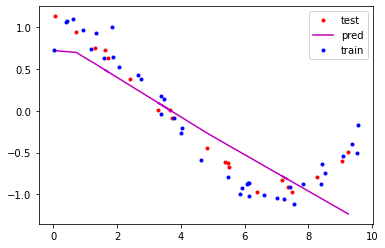

In [18]:
y_pred_drop2 = Model_drop(x_train, y_train, x_test, y_test, 10, 150, 0.01, 0.05)

<h3 style="color:blue;">so finally with the learning rate of 0.01 of SGD with 150 epochs and 10 batches with 0.1 drop out value loss has decreased from 0.15 to 0.074</h3>